In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data/titanic/train.csv")

In [38]:
df.info()
c = df.columns
for i in c:
    print(i,df[i].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int32
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
C           889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
AgeSD       889 non-null float64
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 94.7 KB
Survived [0 1]
Pclass [3 1 2]
Sex [1 0]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     83.475   27.9

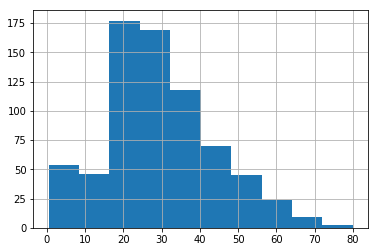

In [12]:
df.Age.hist()

In [14]:
ageAv = df.Age.mean()

In [16]:
df.Age = df.Age.fillna(ageAv)

In [19]:
df.drop(['Cabin'],axis = 1, inplace = True)

In [23]:
df = df.dropna()

In [25]:
df['Sex'] = (df['Sex']=='male').astype(np.int)

C:\Users\freakylemon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


drop features that seem not usable

In [29]:
df = df.drop(['Name'],axis =1)

In [30]:
df = df.drop(['Ticket'],axis =1)

In [33]:
df = df.drop(['PassengerId'],axis=1)

'dummy' embarked feature

In [34]:
oh_ = pd.get_dummies(df['Embarked'])
df = df.join(oh_)
df = df.drop(['Embarked'],axis=1)

perform standardise

In [36]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))

In [37]:
df = df.drop(['Age'],axis=1)

perform train test split?

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)

start with the classification

In [39]:
from sklearn.linear_model import LogisticRegression

In [76]:
logRe = LogisticRegression(solver='newton-cg', max_iter = 10000)
# str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.

In [46]:
logRe.fit(X_train,y_train)

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
logRe.coef_

array([[-1.13756386, -2.65422573, -0.37860555,  0.04361484,  0.00477844,
         0.84428929,  0.86803028,  0.57845842, -0.53114142]])

In [48]:
logRe.intercept_

array([2.97014992])

In [60]:
y_pred = (logRe.predict(X_train))

In [58]:
# (res[res == 0].value_counts()/len(y_train))

0    0.811897
Name: Survived, dtype: float64

confusion matrix

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

insample

In [61]:
print(confusion_matrix(y_pred,y_train))

[[340  67]
 [ 50 165]]


In [63]:
y_pred_test = logRe.predict(X_test)

In [79]:
print(confusion_matrix(y_pred_test,y_test),
     classification_report(y_test,y_pred_test))

[[138  37]
 [ 21  71]]               precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

   micro avg       0.78      0.78      0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



to calculate the accuracy, precision, recall

excluding one feature at a time:

In [66]:
allFea = df.columns

In [71]:
feaLst = []
for i in allFea:
    feaLst.append(i)

In [72]:
feaLst.remove('Survived')

In [80]:
for i in feaLst:
    X = df.drop([i],axis=1)
    y = df['Survived']
    X = df.drop(['Survived'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
    logRe.fit(X_train, y_train)
    y_pred = logRe.predict(X_train)
    
    y_pred_test = logRe.predict(X_test)
    print(i,
          confusion_matrix(y_pred_test,y_test),
          classification_report(y_test,y_pred_test))
    

Pclass [[138  37]
 [ 21  71]]               precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

   micro avg       0.78      0.78      0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267

Sex [[138  37]
 [ 21  71]]               precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

   micro avg       0.78      0.78      0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267

SibSp [[138  37]
 [ 21  71]]               precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

   micro avg       0.78      0.78      0.78       267
   macro avg       0.78      0.76      0.7